In [14]:
# Start a working ipython console
%qtconsole

In [13]:
# Get working Directory
import os
os.getcwd()

'C:\\Users\\hp\\Desktop\\Data Science\\FastAI_Recommendation'

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from fastai.collab import CollabDataBunch, collab_learner

In [13]:
ratings_df = pd.read_csv('dataset/ratings.csv',header = 0 , )
movies_df = pd.read_csv('dataset/movies.csv', header = 0)

ratings_df.head()
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [31]:
# Merge moviesdf and ratingsdf
df = pd.merge(movies_df,ratings_df,on = 'movieId', how='inner')
# df.head()

# Checking for missing values
df.isnull().values.any()

# Remove title and genre columns (collab library takes number values)
df =df.drop(['title','genres'],axis=1)

df.head()

,movieId,userId,rating,timestamp
0,1,1,4.0,964982703
1,1,5,4.0,847434962
2,1,7,4.5,1106635946
3,1,15,2.5,1510577970
4,1,17,4.5,1305696483


In [37]:
# A DataBunch object consists of train_dl, valid_dl and test_dl (Wrapped in DeviceDataLoader to be loaded into Pytorch)
# Creates a databunch. Using the split percentage pct_val, split the dataset to train and test sets, in this case 80-20 train-test split
 
data = CollabDataBunch.from_df(df, valid_pct = 0.2, seed=1) 

data.show_batch()


movieId,userId,target
1542,275,3.0
1240,78,5.0
1674,462,3.0
117529,256,4.0
1247,510,4.0


In [38]:
# Set weight decay to 0.1, 

learn = collab_learner(data, n_factors=40, y_range=[0,5.5], wd=.1)

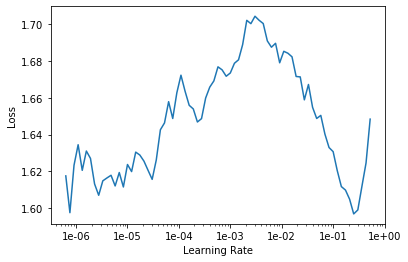

In [40]:
# Before beginning, train the model to find the mean squared error
# Optimal learning rate of about 0.09 (one tenth of the minimum loss)
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [42]:
# Fit a single cycle
learn.fit_one_cycle(2,0.1)

epoch,train_loss,valid_loss,time
0,2.104216,2.032718,01:26
1,0.829753,0.834107,01:32
